In [1]:
import pandas as pd
from matplotlib import pyplot as plt
#https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data
df = pd.read_csv('data.csv')
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [2]:
import math
df_rel = df[['Life expectancy ', 'GDP']]
data = df_rel.to_dict()
l = len(list(data['GDP'].values()))
for k in data:
    data[k] = list(data[k].values())
final_data = [(data['GDP'][i],data['Life expectancy '][i]) for i in range(l)]
data = final_data
data = [(x,y) for x,y in data if not math.isnan(x) and not math.isnan(y)]
print(len(data))
data[:4]

2485


[(584.25921, 65.0), (612.696514, 59.9), (631.744976, 59.9), (669.959, 59.5)]

First, we'll do some basic statistics on this dataset to get an understanding for what we're working with.

In [3]:
gdps = [x[0] for x in data]
les = [x[1] for x in data]
min_gdp = min(gdps)
max_gdp = max(gdps)
min_le = min(les)
max_le = max(les)
avg_gdp = sum(gdps)/len(gdps)
avg_le = sum(les)/len(les)
print(f'Basic Statistics\n- [GDP] min: {min_gdp}; max: {max_gdp}; avg: {avg_gdp}')
print(f'- [LE] min: {min_le}; max: {max_le}; avg: {avg_le}')

Basic Statistics
- [GDP] min: 1.68135; max: 119172.7418; avg: 7494.210719388659
- [LE] min: 36.3; max: 89.0; avg: 69.37066398390344


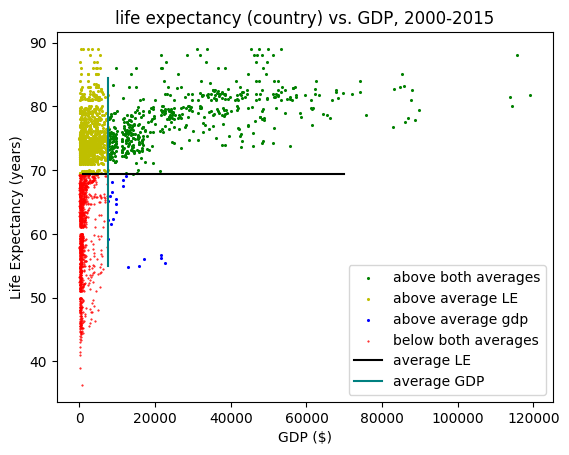

In [4]:
from plot import Plot
p = Plot()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] > avg_gdp]),label='above both averages',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] > avg_le and gdps[i] <= avg_gdp]),label='above average LE',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] > avg_gdp]),label='above average gdp',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=([gdps[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp],
                    [les[i] for i in range(len(gdps)) if les[i] <= avg_le and gdps[i] <= avg_gdp]),label='below both averages',
                    scatterArgs={'s':0.25,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
plt.plot([])
plt.legend()
p._showPlt()

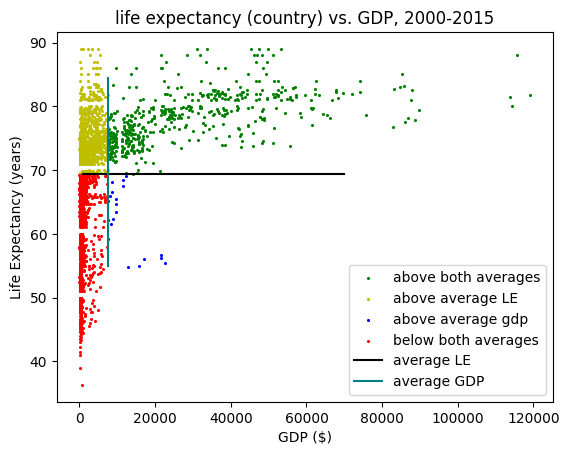

In [36]:
cat1 = [i for i in range(len(gdps)) if gdps[i] < avg_gdp and les[i] < avg_le]
cat2 = [i for i in range(len(gdps)) if gdps[i] < avg_gdp and les[i] >= avg_le]
cat3 = [i for i in range(len(gdps)) if gdps[i] >= avg_gdp and les[i] < avg_le]
cat4 = [i for i in range(len(gdps)) if gdps[i] >= avg_gdp and les[i] >= avg_le]

def _extract(idxs,arr):
       out = []
       for i in idxs:
              out.append(arr[i])
       return out

def extract(idxs,*arrs):
       out = []
       for _,a in enumerate(*arrs):
              out.append(_extract(idxs,a))
       return tuple(out)

p.plotGeneric(data=extract(cat4,[gdps,les]),label='above both averages',
                    scatterArgs={'s':1.5,'color':'g'},
                    wait=True)
p._legend()
p.plotGeneric(data=extract(cat2,[gdps,les]),label='above average LE',
                    scatterArgs={'s':1.5,'color':'y'},
                    wait=True)
p._legend()
p.plotGeneric(data=extract(cat3,[gdps,les]),label='above average gdp',
                    scatterArgs={'s':1.5,'color':'b'},
                    wait=True)
p._legend()
p.plotGeneric(data=extract(cat1,[gdps,les]),label='below both averages',
                    scatterArgs={'s':1.5,'color':'r'},
                    wait=True,
                    chart={'title':'life expectancy (country) vs. GDP, 2000-2015',
                           'xlabel':'GDP ($)',
                           'ylabel':'Life Expectancy (years)'})
plt.plot([1000,70000],[avg_le,avg_le],label='average LE',color='black')
plt.plot([avg_gdp,avg_gdp],[55,84.5],label='average GDP',color='teal')
# plt.plot([])
plt.legend()
p._showPlt()


In [ ]:
!pip3 install scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=5)
categories = [1,2,3,4]

In [ ]:
#todo: knn, other clustering